In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [34]:
#Importing Influenza data from CDC.gov
df=pd.read_csv(r'/Users/jryan120/Desktop/Deaths_from_Influenza.csv')

In [35]:
df

,geoid,Region,State,age,season,MMWR Year/Week,Deaths from influenza,Deaths from pneumonia,Deaths from pneumonia and influenza,All Deaths,Pecent of deaths due to pneumonia or influenza,pecent complete
0,State,NaN,Maryland,All,2017-18,201831,NaN,NaN,64,949,6.743941,113.919027
1,State,NaN,Texas,All,2017-18,201819,NaN,NaN,242,"3,664",6.604803,114.085145
2,State,NaN,Pennsylvania,All,2017-18,201802,NaN,NaN,282,"3,185",8.854003,132.193632
3,State,NaN,Colorado,All,2017-18,201818,NaN,NaN,41,702,5.840456,114.551843
4,State,NaN,Maryland,All,2017-18,201807,NaN,NaN,87,"1,060",8.207547,127.243592
...,...,...,...,...,...,...,...,...,...,...,...,...
32601,State,NaN,New York,All,2011-12,201209,NaN,NaN,159,"1,977",8.042489,108.443629
32602,State,NaN,Kentucky,All,2016-17,201648,NaN,NaN,88,960,9.166667,118.490521
32603,State,NaN,South Carolina,All,2014-15,201502,NaN,NaN,106,"1,075",9.860465,134.847612
32604,Region,8.0,NaN,All,2013-14,201424,1,112,113,"1,479",7.640297,105.555916


In [36]:
df=df.rename(columns={'MMWR Year/Week':'Date','Deaths from influenza':'Flu_deaths','Deaths from pneumonia':'P_deaths','Deaths from pneumonia and influenza':'P&I_deaths','All Deaths':'All_deaths', 'Pecent of deaths due to pneumonia or influenza':'P&I_percent'}) 

df

,geoid,Region,State,age,season,Date,Flu_deaths,P_deaths,P&I_deaths,All_deaths,P&I_percent,pecent complete
0,State,NaN,Maryland,All,2017-18,201831,NaN,NaN,64,949,6.743941,113.919027
1,State,NaN,Texas,All,2017-18,201819,NaN,NaN,242,"3,664",6.604803,114.085145
2,State,NaN,Pennsylvania,All,2017-18,201802,NaN,NaN,282,"3,185",8.854003,132.193632
3,State,NaN,Colorado,All,2017-18,201818,NaN,NaN,41,702,5.840456,114.551843
4,State,NaN,Maryland,All,2017-18,201807,NaN,NaN,87,"1,060",8.207547,127.243592
...,...,...,...,...,...,...,...,...,...,...,...,...
32601,State,NaN,New York,All,2011-12,201209,NaN,NaN,159,"1,977",8.042489,108.443629
32602,State,NaN,Kentucky,All,2016-17,201648,NaN,NaN,88,960,9.166667,118.490521
32603,State,NaN,South Carolina,All,2014-15,201502,NaN,NaN,106,"1,075",9.860465,134.847612
32604,Region,8.0,NaN,All,2013-14,201424,1,112,113,"1,479",7.640297,105.555916


In [37]:
df.dtypes

geoid               object
Region             float64
State               object
age                 object
season              object
Date                 int64
Flu_deaths          object
P_deaths            object
P&I_deaths          object
All_deaths          object
P&I_percent        float64
pecent complete    float64
dtype: object

In [38]:
df['State'] = df['State'].astype(str)

df.dtypes

geoid               object
Region             float64
State               object
age                 object
season              object
Date                 int64
Flu_deaths          object
P_deaths            object
P&I_deaths          object
All_deaths          object
P&I_percent        float64
pecent complete    float64
dtype: object

In [39]:
#Restricting by date
apr=df['Date']>=201814
nov=df['Date']<201849
df=df[apr & nov]


In [40]:
df

,geoid,Region,State,age,season,Date,Flu_deaths,P_deaths,P&I_deaths,All_deaths,P&I_percent,pecent complete
0,State,NaN,Maryland,All,2017-18,201831,NaN,NaN,64,949,6.743941,113.919027
1,State,NaN,Texas,All,2017-18,201819,NaN,NaN,242,"3,664",6.604803,114.085145
3,State,NaN,Colorado,All,2017-18,201818,NaN,NaN,41,702,5.840456,114.551843
6,State,NaN,District of Columbia,All,2018-19,201842,NaN,NaN,8,96,8.333333,107.495312
7,State,NaN,Massachusetts,All,2017-18,201828,NaN,NaN,67,"1,062",6.308851,105.174922
...,...,...,...,...,...,...,...,...,...,...,...,...
32100,State,NaN,Maryland,All,2017-18,201824,NaN,NaN,50,868,5.760369,104.195696
32123,State,NaN,Wyoming,All,2017-18,201836,NaN,NaN,5,105,4.761905,125.042735
32336,State,NaN,Alaska,All,2017-18,201817,NaN,NaN,5,81,6.172840,112.373050
32509,State,NaN,Nebraska,All,2017-18,201823,NaN,NaN,20,309,6.472492,105.820184


In [42]:
df_2=df[['P&I_percent','State', 'Date']]
df_2=df_2.dropna()
df_2


,P&I_percent,State,Date
0,6.743941,Maryland,201831
1,6.604803,Texas,201819
3,5.840456,Colorado,201818
6,8.333333,District of Columbia,201842
7,6.308851,Massachusetts,201828
...,...,...,...
32100,5.760369,Maryland,201824
32123,4.761905,Wyoming,201836
32336,6.172840,Alaska,201817
32509,6.472492,Nebraska,201823


In [43]:
def function (row):
    if row['State'] == 'Alabama':
        return 'South'
    elif row['State'] == 'Alaska':
        return 'North'
    elif row['State'] == 'Arizona':
        return 'South'
    elif row['State'] == 'Arkansas':
        return 'South'
    elif row['State'] == 'California':
        return 'Middle'
    elif row['State'] == 'Colorado':
        return 'Middle'
    elif row['State'] == 'Connecticut':
        return 'North'
    elif row['State'] == 'Delaware':
        return 'Middle'
    elif row['State'] == 'Florida':
        return 'South'
    elif row['State'] == 'Georgia':
        return 'South'
    elif row['State'] == 'Hawaii':
        return 'South'
    elif row['State'] == 'Idaho':
        return 'North'
    elif row['State'] == 'Illinois':
        return 'Middle'
    elif row['State'] == 'Indiana':
        return 'Middle'
    elif row['State'] == 'Iowa':
        return 'Middle'
    elif row['State'] == 'Kansas':
        return 'Middle'
    elif row['State'] == 'Kentucky':
        return 'Middle'
    elif row['State'] == 'Louisiana':
        return 'South'
    elif row['State'] == 'Maine':
        return 'North'
    elif row['State'] == 'Maryland':
        return 'Middle'
    elif row['State'] == 'Massachusetts':
        return 'North'
    elif row['State'] == 'Michigan':
        return 'North'
    elif row['State'] == 'Minnesota':
        return 'North'
    elif row['State'] == 'Mississippi':
        return 'South'
    elif row['State'] == 'Missouri':
        return 'Middle'
    elif row['State'] == 'Montana':
        return 'North'
    elif row['State'] == 'Nebraska':
        return 'Middle'
    elif row['State'] == 'Nevada':
        return 'Middle'
    elif row['State'] == 'New Hampshire':
        return 'North'
    elif row['State'] == 'New Jersey':
        return 'North'
    elif row['State'] == 'New Mexico':
        return 'South'
    elif row['State'] == 'New York':
        return 'North'
    elif row['State'] == 'North Carolina':
        return 'Middle'
    elif row['State'] == 'North Dakota':
        return 'North'
    elif row['State'] == 'Ohio':
        return 'Middle'
    elif row['State'] == 'Oklahoma':
        return 'Middle'
    elif row['State'] == 'Oregon':
        return 'North'
    elif row['State'] == 'Pennsylvania':
        return 'North'
    elif row['State'] == 'Rhode Island':
        return 'North'
    elif row['State'] == 'South Carolina':
        return 'South'
    elif row['State'] == 'South Dakota':
        return 'North'
    elif row['State'] == 'Tennessee':
        return 'Middle'
    elif row['State'] == 'Texas':
        return 'South'
    elif row['State'] == 'Utah':
        return 'Middle'
    elif row['State'] == 'Vermont':
        return 'North'
    elif row['State'] == 'Virginia':
        return 'Middle'
    elif row['State'] == 'Washington':
        return 'North'
    elif row['State'] == 'West Virginia':
        return 'Middle'
    elif row['State'] == 'Wisconsin':
        return 'North'
    elif row['State'] == 'Wyoming':
        return 'Middle'
    
    
    
df_2['Zone']=df.apply(function, axis=1)



In [44]:
df_2.dtypes

P&I_percent    float64
State           object
Date             int64
Zone            object
dtype: object

In [45]:
df_2.sort_values('Date', axis=0, ascending=True, inplace=True)
df_2

,P&I_percent,State,Date,Zone
4716,7.140605,nan,201814,None
21298,7.207207,Rhode Island,201814,North
2472,6.622084,nan,201814,None
4284,8.488459,Tennessee,201814,Middle
2378,5.731707,Georgia,201814,South
...,...,...,...,...
3238,4.727794,Oregon,201848,North
3200,5.911330,Montana,201848,North
957,5.370844,Colorado,201848,Middle
3423,7.483128,California,201848,Middle


In [46]:
PIP = df_2['P&I_percent']
PIPMean = np.mean(PIP)
PIPMax = np.max(PIP)
PIPMin = np.min(PIP)
print ('Mean = ', PIPMean, 'Max =', PIPMax, 'Min = ', PIPMin)


Mean =  5.755097532683621 Max = 14.084507042 Min =  0.0


In [47]:
PIPMean / 2

2.8775487663418104

In [48]:
(14.08 - 5.85) / 2 

4.115

In [49]:
5.85 + 4.11

9.96

In [50]:
def function (row):
    if row['P&I_percent'] >0 and row['P&I_percent'] <= 3:
        return 'Low'
    elif row['P&I_percent'] >3 and row['P&I_percent'] <=6:
        return 'Med Low'
    elif row['P&I_percent'] >6 and row['P&I_percent'] <=9:
        return 'Med High'
    elif row['P&I_percent'] >9 and row['P&I_percent'] <=15:
        return 'High' 
    
    
df_2['Levels']=df.apply(function, axis=1)
df_2

,P&I_percent,State,Date,Zone,Levels
4716,7.140605,nan,201814,None,Med High
21298,7.207207,Rhode Island,201814,North,Med High
2472,6.622084,nan,201814,None,Med High
4284,8.488459,Tennessee,201814,Middle,Med High
2378,5.731707,Georgia,201814,South,Med Low
...,...,...,...,...,...
3238,4.727794,Oregon,201848,North,Med Low
3200,5.911330,Montana,201848,North,Med Low
957,5.370844,Colorado,201848,Middle,Med Low
3423,7.483128,California,201848,Middle,Med High


In [96]:
number = []
for i in range(len(df_2['Levels'])):
    number.append(i)

In [98]:
df_2['Xind'] = number
df_2

,P&I_percent,State,Date,Zone,Levels,Marks,Xind
4716,7.140605,nan,201814,None,Med High,April 1st,0
21298,7.207207,Rhode Island,201814,North,Med High,April 1st,1
2472,6.622084,nan,201814,None,Med High,April 1st,2
4284,8.488459,Tennessee,201814,Middle,Med High,April 1st,3
2378,5.731707,Georgia,201814,South,Med Low,April 1st,4
...,...,...,...,...,...,...,...
3238,4.727794,Oregon,201848,North,Med Low,Nov 30th,2305
3200,5.911330,Montana,201848,North,Med Low,Nov 30th,2306
957,5.370844,Colorado,201848,Middle,Med Low,Nov 30th,2307
3423,7.483128,California,201848,Middle,Med High,Nov 30th,2308


In [101]:
df_2.set_index('Xind')

,P&I_percent,State,Date,Zone,Levels,Marks
Xind,,,,,,
0,7.140605,nan,201814,None,Med High,April 1st
1,7.207207,Rhode Island,201814,North,Med High,April 1st
2,6.622084,nan,201814,None,Med High,April 1st
3,8.488459,Tennessee,201814,Middle,Med High,April 1st
4,5.731707,Georgia,201814,South,Med Low,April 1st
...,...,...,...,...,...,...
2305,4.727794,Oregon,201848,North,Med Low,Nov 30th
2306,5.911330,Montana,201848,North,Med Low,Nov 30th
2307,5.370844,Colorado,201848,Middle,Med Low,Nov 30th


In [110]:
def function (row):
    if row['P&I_percent'] > 7.2  and row['Date'] < 201829:
        return 'High Death Rate Early'
    elif row['P&I_percent'] > 7.2 and row['Date'] > 201829:
        return 'High Death Rate Late'
    
    
    
    
df_2['Death Rate']=df.apply(function, axis=1)

df_2

,P&I_percent,State,Date,Zone,Levels,Marks,Xind,Death Rate
4716,7.140605,nan,201814,None,Med High,April 1st,0,None
21298,7.207207,Rhode Island,201814,North,Med High,April 1st,1,High Death Rate Early
2472,6.622084,nan,201814,None,Med High,April 1st,2,None
4284,8.488459,Tennessee,201814,Middle,Med High,April 1st,3,High Death Rate Early
2378,5.731707,Georgia,201814,South,Med Low,April 1st,4,None
...,...,...,...,...,...,...,...,...
3238,4.727794,Oregon,201848,North,Med Low,Nov 30th,2305,None
3200,5.911330,Montana,201848,North,Med Low,Nov 30th,2306,None
957,5.370844,Colorado,201848,Middle,Med Low,Nov 30th,2307,None
3423,7.483128,California,201848,Middle,Med High,Nov 30th,2308,High Death Rate Late


In [117]:
table= pd.crosstab(index=df_2['Zone'], columns=df_2['Levels'])
table

Levels,High,Low,Med High,Med Low
Zone,,,,
Middle,26,5,291,378
North,32,44,220,368
South,25,2,110,248


In [119]:
x_values = table["Zone"]
y_values = table["Levels"]

import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(10,6)) # Change the figure size here       
axs.bar(x_values, y_values, color=('deepskyblue')) # You specify the color here     
axs.set_title("COVID-19 Cases Broken Down by Race", 
              fontsize=20, fontweight="bold")   
axs.set_xlabel("Race", fontsize=14)
axs.set_ylabel("Cases", fontsize=14)
axs.tick_params(labelsize=16)  
plt.grid(axis='y')
plt.show() 

KeyError: 'Zone'

In [89]:
# None of these work because the data type is object.  I can't make it change.
labels = table['Levels']
y_value1 = table['Middle']
y_value2 = table['North']
y_value3 = table['South']


x = np.arange(len(labels))
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width/2, y_value1, width, label='White', color='orange')
ax.bar(x + width/2, y_value2, width, label='Black', color='blue')
ax.bar(x + 2*width/2, y_value2, width, label='Black', color='red')



ax.set_ylabel('Frequency', fontsize=14)
ax.set_xlabel('Zones', fontsize=14)
ax.set_title('Pneumonia and Influenza Death Rates by Zone',
             fontsize=20, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend()


plt.show()

KeyError: 'Levels'

In [53]:
North=df_2['Zone']=='North'
Middle=df_2['Zone']=='Middle'
South=df_2['Zone']=='South'

In [54]:
North_df=df_2[North]
North_df

,P&I_percent,State,Date,Zone,Levels
21298,7.207207,Rhode Island,201814,North,Med High
2369,5.435196,Pennsylvania,201814,North,Med Low
852,7.335907,Wisconsin,201814,North,Med High
4620,6.656877,Michigan,201814,North,Med High
3594,7.705628,Massachusetts,201814,North,Med High
...,...,...,...,...,...
653,1.075269,Alaska,201848,North,Low
999,6.804734,New York,201848,North,Med High
3319,5.424063,Wisconsin,201848,North,Med Low
3238,4.727794,Oregon,201848,North,Med Low


In [55]:
South_df=df_2[South]
South_df

,P&I_percent,State,Date,Zone,Levels
2378,5.731707,Georgia,201814,South,Med Low
428,10.810811,Hawaii,201814,South,High
557,5.452775,Alabama,201814,South,Med Low
2062,4.986877,New Mexico,201814,South,Med Low
3916,7.012359,Texas,201814,South,Med High
...,...,...,...,...,...
2466,4.661390,Arizona,201848,South,Med Low
2291,6.037152,Arkansas,201848,South,Med High
514,4.319654,Louisiana,201848,South,Med Low
517,6.014658,Texas,201848,South,Med High


In [56]:
South_df.sort_values(by=['Date'])
South_df

,P&I_percent,State,Date,Zone,Levels
2378,5.731707,Georgia,201814,South,Med Low
428,10.810811,Hawaii,201814,South,High
557,5.452775,Alabama,201814,South,Med Low
2062,4.986877,New Mexico,201814,South,Med Low
3916,7.012359,Texas,201814,South,Med High
...,...,...,...,...,...
2466,4.661390,Arizona,201848,South,Med Low
2291,6.037152,Arkansas,201848,South,Med High
514,4.319654,Louisiana,201848,South,Med Low
517,6.014658,Texas,201848,South,Med High


In [57]:
Middle_df=df_2[Middle]
Middle_df

,P&I_percent,State,Date,Zone,Levels
4284,8.488459,Tennessee,201814,Middle,Med High
2252,6.338616,Missouri,201814,Middle,Med High
27988,5.905512,Colorado,201814,Middle,Med Low
26407,7.407407,Wyoming,201814,Middle,Med High
2034,8.617886,Iowa,201814,Middle,Med High
...,...,...,...,...,...
3884,4.696133,Utah,201848,Middle,Med Low
3356,5.690608,North Carolina,201848,Middle,Med Low
957,5.370844,Colorado,201848,Middle,Med Low
3423,7.483128,California,201848,Middle,Med High


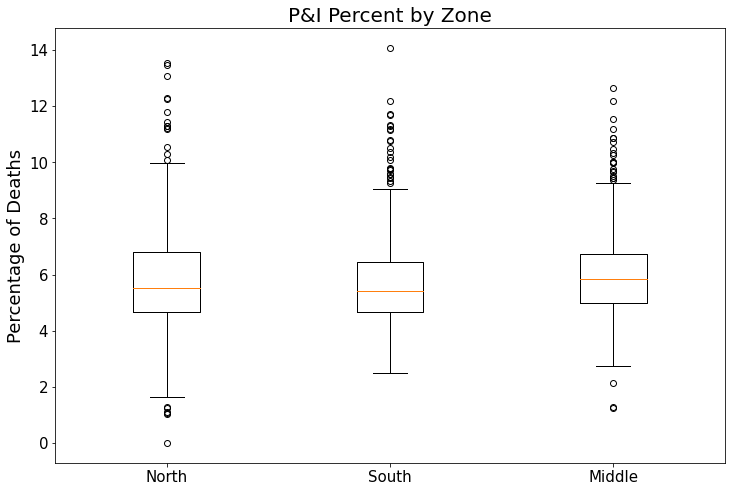

In [58]:
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot ([North_df['P&I_percent'], South_df['P&I_percent'],
             Middle_df['P&I_percent']])
             
plt.title('P&I Percent by Zone', fontsize=20)
axs.set_xticklabels(['North', 'South', 'Middle'])
axs.set_ylabel('Percentage of Deaths', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [59]:
f, p = stats.f_oneway(North_df['P&I_percent'], South_df['P&I_percent'],
            Middle_df['P&I_percent'])

print("F:", f)
print("p:", p)

F: 3.81121284986598
p: 0.022305488577705843


In [60]:
def function (row):
    if row['Date'] == 201814:
        return 'April 1st'
    elif row['Date'] == 201822:
        return 'May 31st'
    elif row['Date'] == 201831:
        return 'July 31st'
    elif row['Date'] == 201840:
        return 'Sept 30th' 
    elif row['Date'] == 201848:
        return 'Nov 30th'
    
    
df_2['Marks']=df.apply(function, axis=1)

In [61]:
df_2

,P&I_percent,State,Date,Zone,Levels,Marks
4716,7.140605,nan,201814,None,Med High,April 1st
21298,7.207207,Rhode Island,201814,North,Med High,April 1st
2472,6.622084,nan,201814,None,Med High,April 1st
4284,8.488459,Tennessee,201814,Middle,Med High,April 1st
2378,5.731707,Georgia,201814,South,Med Low,April 1st
...,...,...,...,...,...,...
3238,4.727794,Oregon,201848,North,Med Low,Nov 30th
3200,5.911330,Montana,201848,North,Med Low,Nov 30th
957,5.370844,Colorado,201848,Middle,Med Low,Nov 30th
3423,7.483128,California,201848,Middle,Med High,Nov 30th


In [62]:
df_2
df_2.dtypes

P&I_percent    float64
State           object
Date             int64
Zone            object
Levels          object
Marks           object
dtype: object

In [87]:

table=pd.crosstab(index=df_2['Levels'], columns= 'count')
table

col_0,count
Levels,
High,89
Low,90
Med High,818
Med Low,1310


In [88]:

table=pd.crosstab(index=df_2['Levels'], columns= df_2['Marks'])
table

Marks,April 1st,July 31st,May 31st,Nov 30th,Sept 30th
Levels,,,,,
High,13,0,3,2,2
Low,1,5,2,3,4
Med High,40,18,28,30,28
Med Low,12,43,33,31,32


TypeError: 'value' must be an instance of str or bytes, not a NoneType

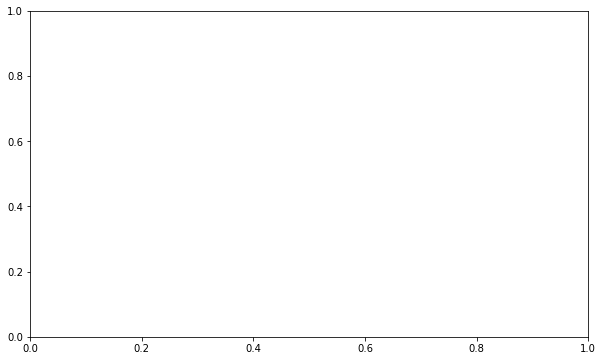

In [93]:
x_values = df_2["Marks"]
y_values = df_2["P&I_percent"]

import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(10,6)) # Change the figure size here       
axs.bar(x_values, y_values, color=('deepskyblue')) # You specify the color here     
axs.set_title("COVID-19 Cases Broken Down by Race", 
              fontsize=20, fontweight="bold")   
axs.set_xlabel("Race", fontsize=14)
axs.set_ylabel("Cases", fontsize=14)
axs.tick_params(labelsize=16)  
plt.grid(axis='y')
plt.show() 

In [63]:
North=df_2['Zone']=='North'
Middle=df_2['Zone']=='Middle'
South=df_2['Zone']=='South'

April=df_2['Marks']=='April 1st'
May=df_2['Marks']=='May 31st'
July=df_2['Marks']=='July 31st'
Sept=df_2['Marks']=='Sept 30th'
Nov=df_2['Marks']=='Nov 30th'


In [74]:
NorthApril_df=df_2[North & April]
NorthMay_df=df_2[North & May]
NorthJuly_df=df_2[North & July]
NorthSept_df=df_2[North & Sept]
NorthNov_df=df_2[North & Nov]

MiddleApril_df=df_2[Middle & April]
MiddleMay_df=df_2[Middle & May]
MiddleJuly_df=df_2[Middle & July]
MiddleSept_df=df_2[Middle & Sept]
MiddleNov_df=df_2[Middle & Nov]

SouthApril_df=df_2[South & April]
SouthMay_df=df_2[South & May]
SouthJuly_df=df_2[South & July]
SouthSept_df=df_2[South & Sept]
SouthNov_df=df_2[South & Nov]

ALLNorth_df=df_2[North & April & May]
ALLMiddle_df=df_2[Middle & April & May & July & Sept & Nov]
ALLSouth_df=df_2[South & April & May & July & Sept & Nov]


In [31]:
napi = NorthApril_df['P&I_percent']
NAmean = np.mean(napi)
NAmean

8.035290349821052

In [32]:
sapi = SouthApril_df['P&I_percent']
SAmean = np.mean(sapi)
SAmean

6.7961900421090915

In [33]:
nspi = NorthSept_df['P&I_percent']
NSmean = np.mean(nspi)
NSmean

5.363389159747368

In [34]:
sspi = SouthSept_df['P&I_percent']
SSmean = np.mean(sspi)
SSmean

5.848742444209091

In [35]:
njpi = NorthJuly_df['P&I_percent']
NJmean = np.mean(njpi)
NJmean

5.080028948578947

In [36]:
sjpi = SouthJuly_df['P&I_percent']
SJmean = np.mean(sjpi)
SJmean

5.292828582854545

In [37]:
nnpi = NorthNov_df['P&I_percent']
NNmean = np.mean(nnpi)
NNmean

5.6854489995052635

In [38]:
snpi = SouthNov_df['P&I_percent']
SNmean = np.mean(snpi)
SNmean

5.778983466781818

In [65]:
data1 = NorthApril_df
data1

,P&I_percent,State,Date,Zone,Levels,Marks
21298,7.207207,Rhode Island,201814,North,Med High,April 1st
2369,5.435196,Pennsylvania,201814,North,Med Low,April 1st
852,7.335907,Wisconsin,201814,North,Med High,April 1st
4620,6.656877,Michigan,201814,North,Med High,April 1st
3594,7.705628,Massachusetts,201814,North,Med High,April 1st
150,13.541667,Alaska,201814,North,High,April 1st
168,6.079027,Connecticut,201814,North,Med High,April 1st
110,8.856406,Washington,201814,North,Med High,April 1st
908,9.261430,Minnesota,201814,North,High,April 1st
1103,5.937292,New Jersey,201814,North,Med Low,April 1st


In [66]:
data2 = NorthNov_df
data2

,P&I_percent,State,Date,Zone,Levels,Marks
4831,5.893464,Pennsylvania,201848,North,Med Low,Nov 30th
1383,7.692308,South Dakota,201848,North,Med High,Nov 30th
444,4.419890,Rhode Island,201848,North,Med Low,Nov 30th
1553,5.940594,Michigan,201848,North,Med Low,Nov 30th
2094,7.572993,Massachusetts,201848,North,Med High,Nov 30th
2179,4.428044,Idaho,201848,North,Med Low,Nov 30th
2182,7.317073,New Hampshire,201848,North,Med High,Nov 30th
2258,8.275862,Maine,201848,North,Med High,Nov 30th
834,4.930233,Washington,201848,North,Med Low,Nov 30th
2428,6.228611,New Jersey,201848,North,Med High,Nov 30th


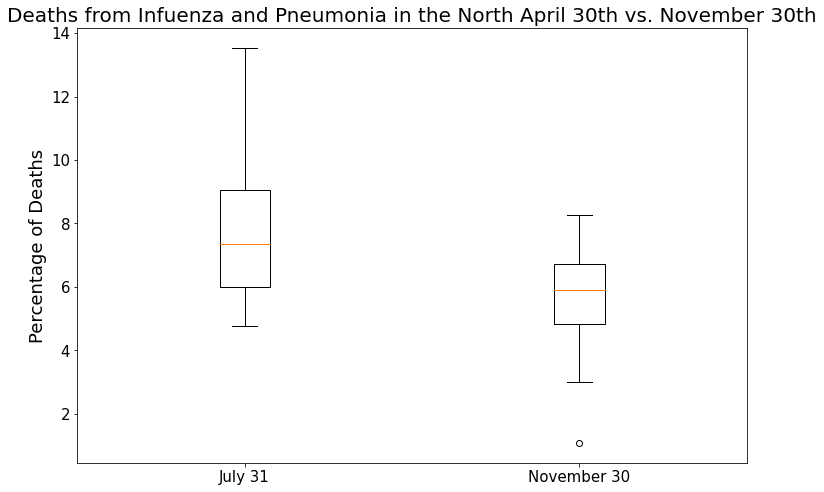

In [164]:
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([data1['P&I_percent'],data2['P&I_percent']])
plt.title('Deaths from Infuenza and Pneumonia in the North April 30th vs. November 30th', fontsize=20)
axs.set_xticklabels(['July 31','November 30'])
axs.set_ylabel('Percentage of Deaths', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [140]:
CI_mean_diff(data2['P&I_percent'], data1['P&I_percent'])

The average difference is: -2.3498413503157884
The 95% CI is: (-3.759624712636085, -0.9400579879954922)


In [141]:
from scipy import stats

t_val, p_val = stats.ttest_ind(data1['P&I_percent'],
                               data2['P&I_percent'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 3.179813760318016
p-value: 0.003386711948978203


In [142]:
data3 = SouthApril_df
data3

,P&I_percent,State,Date,Zone,Marks
557,5.452775,Alabama,201814,South,April 1st
16617,6.503198,South Carolina,201814,South,April 1st
428,10.810811,Hawaii,201814,South,April 1st
1594,9.466437,Arkansas,201814,South,April 1st
2378,5.731707,Georgia,201814,South,April 1st
3916,7.012359,Texas,201814,South,April 1st
4203,5.927579,Florida,201814,South,April 1st
173,7.553366,Arizona,201814,South,April 1st
2062,4.986877,New Mexico,201814,South,April 1st
485,4.601571,Louisiana,201814,South,April 1st


In [143]:
data4 = SouthNov_df
data4

,P&I_percent,State,Date,Zone,Marks
4181,5.230769,Florida,201848,South,Nov 30th
2129,7.019231,South Carolina,201848,South,Nov 30th
2064,8.000000,Hawaii,201848,South,Nov 30th
1800,5.882353,Mississippi,201848,South,Nov 30th
439,4.780115,Alabama,201848,South,Nov 30th
2291,6.037152,Arkansas,201848,South,Nov 30th
2398,4.418886,Georgia,201848,South,Nov 30th
2857,7.204611,New Mexico,201848,South,Nov 30th
514,4.319654,Louisiana,201848,South,Nov 30th
517,6.014658,Texas,201848,South,Nov 30th


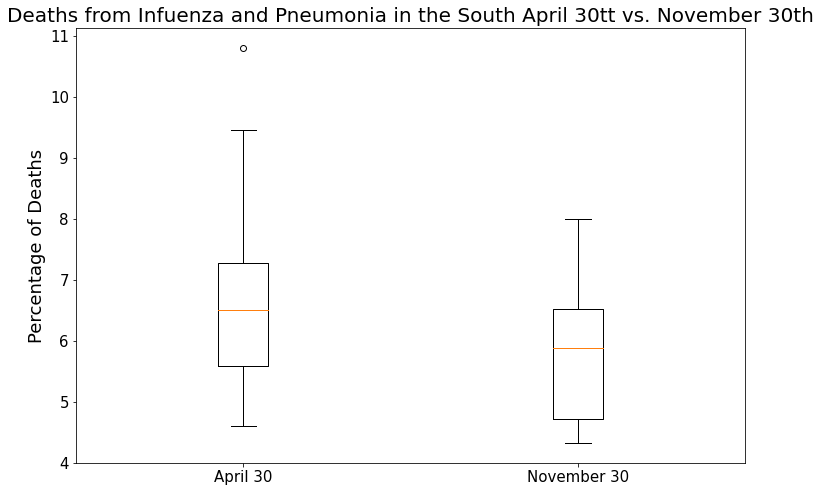

In [165]:
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([data3['P&I_percent'],data4['P&I_percent']])
plt.title('Deaths from Infuenza and Pneumonia in the South April 30tt vs. November 30th', fontsize=20)
axs.set_xticklabels(['April 30','November 30'])
axs.set_ylabel('Percentage of Deaths', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [145]:
CI_mean_diff(data3['P&I_percent'], data4['P&I_percent'])

The average difference is: 1.0172065753272737
The 95% CI is: (-0.25409333861779215, 2.2885064892723395)


In [146]:
from scipy import stats

t_val, p_val = stats.ttest_ind(data4['P&I_percent'],
                               data3['P&I_percent'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: -1.4952743036967928
p-value: 0.15297442993967458


In [147]:
data5 = MiddleApril_df
data5

,P&I_percent,State,Date,Zone,Marks
1124,6.245408,Virginia,201814,Middle,April 1st
701,7.407407,Kansas,201814,Middle,April 1st
2252,6.338616,Missouri,201814,Middle,April 1st
8195,6.371490,Maryland,201814,Middle,April 1st
2631,9.513274,West Virginia,201814,Middle,April 1st
6945,9.770115,Nebraska,201814,Middle,April 1st
4284,8.488459,Tennessee,201814,Middle,April 1st
3949,6.869369,North Carolina,201814,Middle,April 1st
27988,5.905512,Colorado,201814,Middle,April 1st
968,6.523469,Ohio,201814,Middle,April 1st


In [148]:
data6 = MiddleNov_df
data6

,P&I_percent,State,Date,Zone,Marks
1994,6.690141,Nebraska,201848,Middle,Nov 30th
3014,5.068638,Kentucky,201848,Middle,Nov 30th
3423,7.483128,California,201848,Middle,Nov 30th
2213,5.942773,Virginia,201848,Middle,Nov 30th
3884,4.696133,Utah,201848,Middle,Nov 30th
4164,4.738562,Ohio,201848,Middle,Nov 30th
4513,5.600380,Illinois,201848,Middle,Nov 30th
1142,6.779661,Wyoming,201848,Middle,Nov 30th
2951,4.733728,Delaware,201848,Middle,Nov 30th
1941,6.329114,Tennessee,201848,Middle,Nov 30th


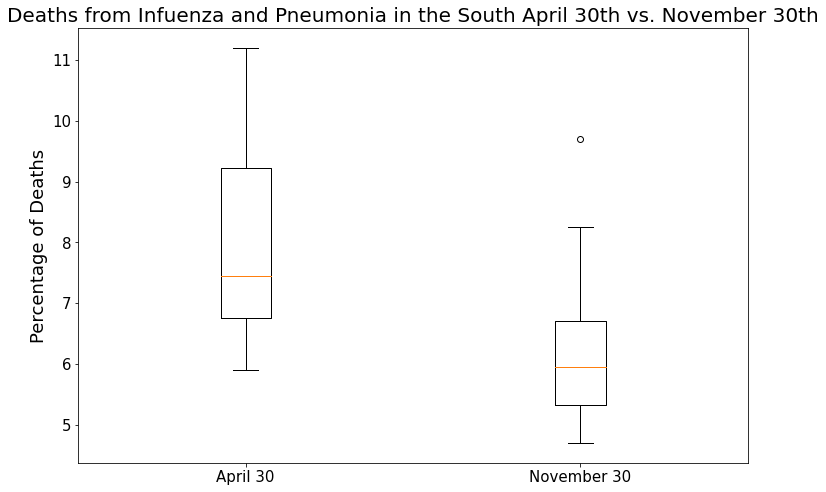

In [166]:
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([data5['P&I_percent'],data6['P&I_percent']])
plt.title('Deaths from Infuenza and Pneumonia in the South April 30th vs. November 30th', fontsize=20)
axs.set_xticklabels(['April 30','November 30'])
axs.set_ylabel('Percentage of Deaths', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [150]:
CI_mean_diff(data5['P&I_percent'], data6['P&I_percent'])

The average difference is: 1.798737941585001
The 95% CI is: (0.9560116500617633, 2.641464233108239)


In [151]:
from scipy import stats

t_val, p_val = stats.ttest_ind(data5['P&I_percent'],
                               data6['P&I_percent'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 4.077549352315076
p-value: 0.00023389953897026025


In [152]:
data7 = NorthApril_df
data7

,P&I_percent,State,Date,Zone,Marks
1103,5.937292,New Jersey,201814,North,April 1st
7635,4.761905,Montana,201814,North,April 1st
110,8.856406,Washington,201814,North,April 1st
30127,13.076923,North Dakota,201814,North,April 1st
908,9.261430,Minnesota,201814,North,April 1st
4620,6.656877,Michigan,201814,North,April 1st
6829,4.966887,Idaho,201814,North,April 1st
6672,6.844106,New Hampshire,201814,North,April 1st
150,13.541667,Alaska,201814,North,April 1st
19032,13.461538,South Dakota,201814,North,April 1st


In [153]:
data8 = SouthApril_df
data8

,P&I_percent,State,Date,Zone,Marks
557,5.452775,Alabama,201814,South,April 1st
16617,6.503198,South Carolina,201814,South,April 1st
428,10.810811,Hawaii,201814,South,April 1st
1594,9.466437,Arkansas,201814,South,April 1st
2378,5.731707,Georgia,201814,South,April 1st
3916,7.012359,Texas,201814,South,April 1st
4203,5.927579,Florida,201814,South,April 1st
173,7.553366,Arizona,201814,South,April 1st
2062,4.986877,New Mexico,201814,South,April 1st
485,4.601571,Louisiana,201814,South,April 1st


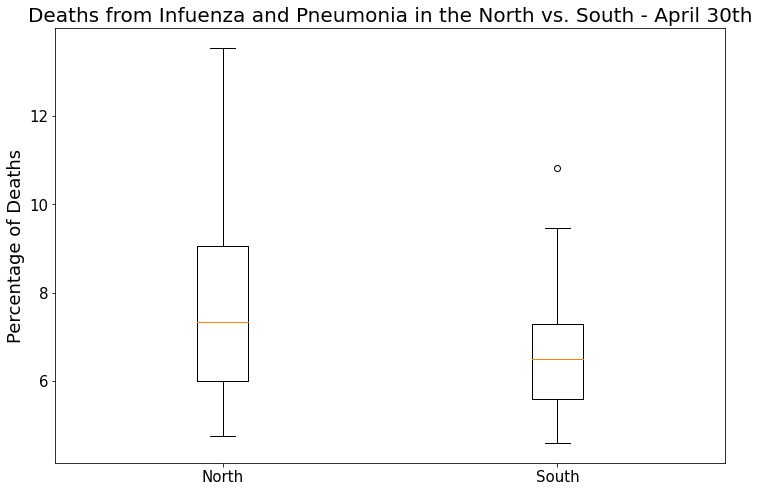

In [167]:
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([data7['P&I_percent'],data8['P&I_percent']])
plt.title('Deaths from Infuenza and Pneumonia in the North vs. South - April 30th', fontsize=20)
axs.set_xticklabels(['North','South'])
axs.set_ylabel('Percentage of Deaths', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [158]:
CI_mean_diff(data7['P&I_percent'], data8['P&I_percent'])


The average difference is: 1.2391003077119604
The 95% CI is: (-0.3605527262321755, 2.8387533416560964)


In [157]:
from scipy import stats

t_val, p_val = stats.ttest_ind(data7['P&I_percent'],
                               data8['P&I_percent'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 1.4641275842681387
p-value: 0.1547450825454272


In [159]:
data9 = NorthNov_df
data9

,P&I_percent,State,Date,Zone,Marks
2258,8.275862,Maine,201848,North,Nov 30th
1553,5.940594,Michigan,201848,North,Nov 30th
999,6.804734,New York,201848,North,Nov 30th
2182,7.317073,New Hampshire,201848,North,Nov 30th
2179,4.428044,Idaho,201848,North,Nov 30th
1383,7.692308,South Dakota,201848,North,Nov 30th
4073,6.108202,Connecticut,201848,North,Nov 30th
834,4.930233,Washington,201848,North,Nov 30th
3200,5.911330,Montana,201848,North,Nov 30th
3238,4.727794,Oregon,201848,North,Nov 30th


In [160]:
data10 = SouthNov_df
data10

,P&I_percent,State,Date,Zone,Marks
4181,5.230769,Florida,201848,South,Nov 30th
2129,7.019231,South Carolina,201848,South,Nov 30th
2064,8.000000,Hawaii,201848,South,Nov 30th
1800,5.882353,Mississippi,201848,South,Nov 30th
439,4.780115,Alabama,201848,South,Nov 30th
2291,6.037152,Arkansas,201848,South,Nov 30th
2398,4.418886,Georgia,201848,South,Nov 30th
2857,7.204611,New Mexico,201848,South,Nov 30th
514,4.319654,Louisiana,201848,South,Nov 30th
517,6.014658,Texas,201848,South,Nov 30th


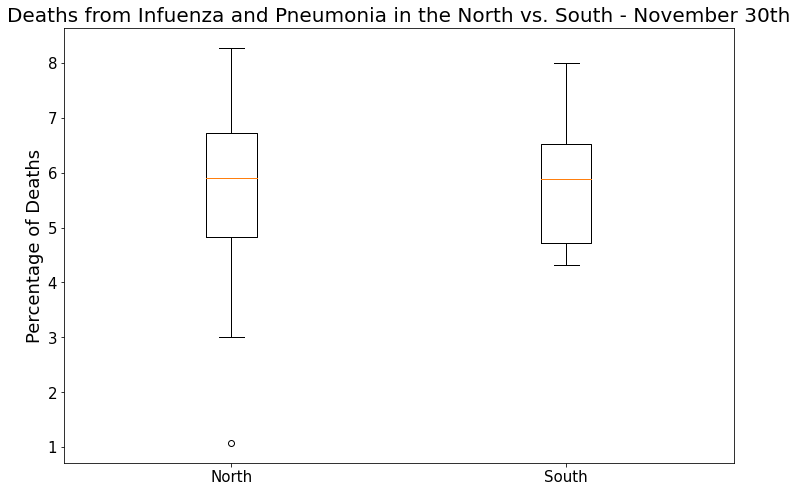

In [168]:
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([data9['P&I_percent'],data10['P&I_percent']])
plt.title('Deaths from Infuenza and Pneumonia in the North vs. South - November 30th', fontsize=20)
axs.set_xticklabels(['North','South'])
axs.set_ylabel('Percentage of Deaths', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [162]:
CI_mean_diff(data9['P&I_percent'], data10['P&I_percent'])

The average difference is: -0.09353446727655435
The 95% CI is: (-1.115690409814273, 0.9286214752611643)


In [163]:
from scipy import stats

t_val, p_val = stats.ttest_ind(data9['P&I_percent'],
                               data10['P&I_percent'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: -0.17290101855608908
p-value: 0.8640429347973264
